# EM算法及其推广

EM算法是含有隐变量的概率模型极大似然估计或极大后验概率估计的迭代算法。含有隐变量的概率模型的数据表示为$\theta$。$Y$是观测变量的数据,$Z$是隐变量的数据，$\theta$是模型参数。EM算法通过迭代求解观测数的对数似然函数$L(\theta)$．EM算法是含有隐变量的概率模型极大似然估计或极大后验概率估计的迭代算法。含有隐变量的概率模型的数据表示为$\theta$ )。这里，$Y$是观测变量的数据，$Z$是隐变量的数据，$\theta$ 是模型参数。EM算法通过迭代求解观测数据的对数似然函数${L}(\theta)=\log {P}(\mathrm{Y} | \theta)$的极大化，实现极大似然估计。每次迭代包括两步：

$E$步，求期望，即求$logP\left(Z | Y, \theta\right)$ )关于$ P\left(Z | Y, \theta^{(i)}\right)$)的期望：

$$Q\left(\theta, \theta^{(i)}\right)=\sum_{Z} \log P(Y, Z | \theta) P\left(Z | Y, \theta^{(i)}\right)$$
称为$Q$函数，这里$\theta^{(i)}$是参数的现估计值；

$M$步，求极大，即极大化$Q$函数得到参数的新估计值：

$$\theta^{(i+1)}=\arg \max _{\theta} Q\left(\theta, \theta^{(i)}\right)$$
 
在构建具体的EM算法时，重要的是定义$Q$函数。每次迭代中，EM算法通过极大化$Q$函数来增大对数似然函数${L}(\theta)$。

2．EM算法在每次迭代后均提高观测数据的似然函数值，即

$$P\left(Y | \theta^{(i+1)}\right) \geqslant P\left(Y | \theta^{(i)}\right)$$

在一般条件下EM算法是收敛的，但不能保证收敛到全局最优。

3．EM算法应用极其广泛，主要应用于含有隐变量的概率模型的学习。高斯混合模型的参数估计是EM算法的一个重要应用，下一章将要介绍的隐马尔可夫模型的非监督学习也是EM算法的一个重要应用。

4．EM算法还可以解释为$F$函数的极大-极大算法。EM算法有许多变形，如GEM算法。GEM算法的特点是每次迭代增加$F$函数值（并不一定是极大化$F$函数），从而增加似然函数值。
)


```
在统计学中，似然函数（likelihood function，通常简写为likelihood，似然）是一个非常重要的内容，在非正式场合似然和概率（Probability）几乎是一对同义词，但是在统计学中似然和概率却是两个不同的概念。概率是在特定环境下某件事情发生的可能性，也就是结果没有产生之前依据环境所对应的参数来预测某件事情发生的可能性，比如抛硬币，抛之前我们不知道最后是哪一面朝上，但是根据硬币的性质我们可以推测任何一面朝上的可能性均为50%，这个概率只有在抛硬币之前才是有意义的，抛完硬币后的结果便是确定的；而似然刚好相反，是在确定的结果下去推测产生这个结果的可能环境（参数），还是抛硬币的例子，假设我们随机抛掷一枚硬币1,000次，结果500次人头朝上，500次数字朝上（实际情况一般不会这么理想，这里只是举个例子），我们很容易判断这是一枚标准的硬币，两面朝上的概率均为50%，这个过程就是我们运用出现的结果来判断这个事情本身的性质（参数），也就是似然。
```


$$P(Y|\theta) = \prod[\pi p^{y_i}(1-p)^{1-y_i}+(1-\pi) q^{y_i}(1-q)^{1-y_i}]$$

### E step:

$$\mu^{i+1}=\frac{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}}{\pi (p^i)^{y_i}(1-(p^i))^{1-y_i}+(1-\pi) (q^i)^{y_i}(1-(q^i))^{1-y_i}}$$

In [1]:
import numpy as np

In [2]:
def e_step(y,j,p,q,pi):
    ab = pi*np.power(p,y[j])*np.power(1-p,1-y[j])
    ap = pi*np.power(p,y[j])*np.power(1-p,1-y[j])+(1-pi)*np.power(q,y[j])*np.power(1-q,1-y[j])
    return ab/ap

data=[1,1,0,1,0,0,1,0,1,1]
pA,pB,pC = 0.5,0.5,0.5

for j in range(len(data)):
    print(e_step(data,j,pA,pB,pC))

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


### M step:

$$\pi^{i+1}=\frac{1}{n}\sum_{j=1}^n\mu^{i+1}_j$$

$$p^{i+1}=\frac{\sum_{j=1}^n\mu^{i+1}_jy_i}{\sum_{j=1}^n\mu^{i+1}_j}$$

$$q^{i+1}=\frac{\sum_{j=1}^n(1-\mu^{i+1}_jy_i)}{\sum_{j=1}^n(1-\mu^{i+1}_j)}$$

In [3]:
class EM:
    
    def __init__(self,params=[0.5,0.5,0.5]):
        self.y = None
        self.u = None
        self.pi,self.p,self.q = params
        self.n_samples = None
    
    def e_step(self,j):
        top = self.pi*np.power(self.p,self.y[j])*np.power(1-self.p,1-self.y[j])
        bottom = self.pi*np.power(self.p,self.y[j])*np.power(1-self.p,1-self.y[j])\
        +(1-self.pi)*np.power(self.q,self.y[j])*np.power(1-self.q,1-self.y[j])
        return top/bottom
    
    def m_step(self):
        self.u = np.array([self.e_step(i) for i in range(self.n_samples)])
        self.pi = np.sum(self.u) / self.n_samples
        self.p  = np.sum([self.u[j]*self.y[j] for j in range(self.n_samples)]) / np.sum(self.u)
        self.q = np.sum([(1-self.u[j])*self.y[j] for j in range(self.n_samples)]) / np.sum(1-self.u)
    
    def fit(self,data):
        self.y = data
        self.n_samples = len(self.y)
        self.m_step()
        print('init params -- pi:{:.3f}, p:{:.3f}, q:{:.3f}'.format(self.pi, self.p, self.q))
        for i in range(self.n_samples):
            _ = yield
            self.m_step()
            print('{}/{}  pi:{:.3f}, p:{:.3f}, q:{:.3f}'.format(i+1, self.n_samples, self.pi, self.p, self.q))

data=[1,1,0,1,0,0,1,0,1,1]

In [4]:
params = [0.5,0.5,0.5]
em = EM(params=params)
f = em.fit(data)
next(f)

init params -- pi:0.500, p:0.600, q:0.600


In [5]:
params = [0.4,0.6,0.7]
em = EM(params=params)
f = em.fit(data)
next(f)

init params -- pi:0.406, p:0.537, q:0.643


In [6]:
params = [0.46,0.55,0.67]
em = EM(params=params)
f = em.fit(data)
next(f)

init params -- pi:0.462, p:0.535, q:0.656


## 高斯混合模型

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


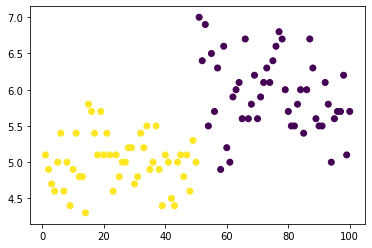

In [7]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 初始化观测数据
# data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60,
#                  75]).reshape(-1, 1)

iris = load_iris()
y = np.array(iris.target)[:100]
data = np.array(iris.data)[:100,:]

gm = GaussianMixture(n_components=2)
gm.fit(data)
y_pred = gm.predict(data)
x = np.c_[np.linspace(1,len(data),len(data)),data]

plt.scatter(x[:,0],x[:,1],c=y_pred)
print(y_pred)

# print("means =", gm.means_.reshape(1, -1))
# print("covariances =", gm.covariances_.reshape(1, -1))
# print("weights = ", gm.weights_.reshape(1, -1))

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

class GMM:
    def __init__(self,data,K=2,alpha=None,means=None,covars=None,eta=0.00000001):
        self.alpha = None # 系数
        self.n_samples,self.n_features = data.shape
        self.y = data
        self.K = K
        self.eta = eta
        
        # 初始化权重系数、方差以及平均值
        if alpha is not None:
            self.alpha = alpha
        else:
            self.alpha  = np.random.rand(self.K)
            self.alpha /= np.sum(self.alpha)        # 归一化
            
        self.means = np.array([
                np.random.rand(self.n_features) for i in range(self.K)
            ]) if means is None else means
        
        self.covars = np.array([
                np.random.rand(self.n_features,self.n_features) for i in range(self.K)
            ]) if covars is None else covars
        
    def gaussian_density(self,x,mean,cov):
        """
        这是自定义的高斯分布概率密度函数
        :param x: 输入数据
        :param mean: 均值数组
        :param cov: 协方差矩阵
        :return: x的概率
        """
        
        # cov的行列式为零时的措施
        covdet = np.linalg.det(cov + np.eye(self.n_features) * 0.001)
        covinv = np.linalg.inv(cov + np.eye(self.n_features) * 0.001)
        xdiff = (x - mean).reshape((1,self.n_features))
        # 概率密度
        prob = 1.0/(np.power(np.power(2*np.pi,self.n_features)*np.abs(covdet),0.5))*\
               np.exp(-0.5*xdiff.dot(covinv).dot(xdiff.T))[0][0]
        return prob
    
    def e_step(self,j):
        p = np.array([
            self.alpha[k]*self.gaussian_density(self.y[j],self.means[k],self.covars[k]) for k in range(self.K)
        ])
        self.gammas[j] = p / np.sum(p)
    
    def m_step(self,k):
        nk = np.sum(self.gammas[:,k])
        self.alpha[k] = nk/self.n_samples*1.0
        self.means[k] = 1.0/nk * np.sum(np.array([
            self.gammas[j][k]*self.y[j] for j in range(self.n_samples)
        ]),axis=0)
        self.covars[k] = 1.0/nk * np.sum(np.array([
            self.gammas[j][k]*np.power(self.y[j]-self.means[k],2)
        ]))
   
    def fit(self,):
        
        loglikelyhood = 0
        oldloglikelyhood = 1
        
        # 当前模型参数下第j个观测数据（样本）属于第k个分模型的概率
        self.gammas = np.array([
            np.zeros(self.K) for j in range(self.n_samples)
        ])
        
        while np.abs(loglikelyhood-oldloglikelyhood) > self.eta:
            oldloglikelyhood = loglikelyhood
            
            for j in range(self.n_samples):
                self.e_step(j)
                
            for k in range(self.K):
                self.m_step(k)
            
            
            loglikelyhood = []
            for n in range(self.n_samples):
                tmp = np.array([np.sum(self.alpha[k]*self.gaussian_density(self.y[n],self.means[k],self.covars[k])) for k in range(self.K)])
                tmp = np.log(np.array(tmp))
                loglikelyhood.append(list(tmp))
            loglikelyhood = np.sum(np.array(loglikelyhood))
            for i in range(self.n_samples):
                self.gammas[i] = self.gammas[i]/np.sum(self.gammas[i])
            self.posibility = self.gammas
            self.prediction = np.array([np.argmax(self.gammas[i]) for i in range(self.n_samples)])
        
    
    def predict(self,):
        pass

# data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60,
#                  75]).reshape(-1, 1)

iris = load_iris()
label = np.array(iris.target)[:100]
data = np.array(iris.data)[:100,:]

gmm = GMM(data)
gmm.fit()
y_pred = gmm.prediction
accuracy_score(y_pred,label),y_pred

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in double_scalars


(1.0,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

## EM算法的推广（FMM）

## GEM

## EM+贝叶斯算法

**解答：** 
> **EM算法的一般化：**  
**E步骤：**根据参数初始化或上一次迭代的模型参数来计算出隐变量的后验概率，其实就是隐变量的期望。作为隐变量的现估计值：$$w_j^{(i)}=Q_{i}(z^{(i)}=j) := p(z^{(i)}=j | x^{(i)} ; \theta)$$
**M步骤：**将似然函数最大化以获得新的参数值：$$
\theta :=\arg \max_{\theta} \sum_i \sum_{z^{(i)}} Q_i (z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)} ; \theta)}{Q_i (z^{(i)})}
$$  

使用NBMM（朴素贝叶斯的混合模型）中的$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数替换一般化的EM算法中的$\theta$参数，然后依次求解$w_j^{(i)}$与$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数的更新问题。  
**NBMM的EM算法：**  
**E步骤：**  
$$w_j^{(i)}:=P\left(z^{(i)}=1 | x^{(i)} ; \phi_z, \phi_{j | z^{(i)}=1}, \phi_{j | z^{(i)}=0}\right)$$**M步骤：**$$
\phi_{j | z^{(i)}=1} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)} I(x_{j}^{(i)}=1)}{\displaystyle \sum_{i=1}^{m} w^{(i)}} \\ 
\phi_{j | z^{(i)}=0}:= \frac{\displaystyle  \sum_{i=1}^{m}\left(1-w^{(i)}\right) I(x_{j}^{(i)}=1)}{ \displaystyle \sum_{i=1}^{m}\left(1-w^{(i)}\right)} \\ 
\phi_{z^{(i)}} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)}}{m} 
$$   

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 初始化观测数据
# data = np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60,
#                  75]).reshape(-1, 1)

iris = load_iris()
y = np.array(iris.target)
data = np.array(iris.data)

gm = BayesianGaussianMixture(n_components=3)
gm.fit(data)
y_pred = gm.predict(data)
x = np.c_[np.linspace(1,len(data),len(data)),data]

plt.scatter(x[:,0],x[:,1],c=y_pred)
# print(y_pred)

accuracy_score(y,y_pred)

# print("means =", gm.means_.reshape(1, -1))
# print("covariances =", gm.covariances_.reshape(1, -1))
# print("weights = ", gm.weights_.reshape(1, -1))

0.49333333333333335

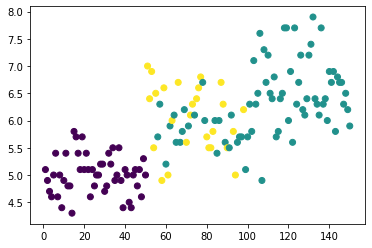